## Equation to solve: $\partial_t u_y = \nu\partial_x^2 u_y - g$, where $g$ is some scaled gravity (depending on the slope of the incline).

In [9]:
"""
Visualizing lava flow
Author: Zhongan Lin
"""

import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation

## Real-time animation seems shaky on macOS, so compiling gif instead

In [13]:
frames = [] # To store all frames to compile

# Grid & diffusion parameters
angle = 90
D = 10 # viscosity
H = 10 # width of lava layer
Ngrid = 100
Nsteps = 500

dt = 0.3
dx = H/Ngrid
g = 10*np.sin(angle * np.pi/180) #gravity
beta = D*dt / (dx**2)
x = np.linspace(0, H, Ngrid)

# Initial condition
u = np.zeros(Ngrid)
# Steady-state solution
u_final = g/D * (np.copy(x)**2 / 2 - H*np.copy(x))

# Evolution
for i in range(Nsteps):

    # Diffusion operation matrices
    A = np.eye(Ngrid)*(1+2*beta) + np.eye(Ngrid,k=1)*(-beta) + \
        np.eye(Ngrid,k=-1)*(-beta)
  
    # Boundary conditions
    A[Ngrid-1, Ngrid-1] = 1 + beta # No stress at air interface
    A[0,0] = 1 # No slip at slope interface
    A[0,1] = 0
     
    # Solve for next time step
    u_inter = u-g*dt # Including source while satisfying boundary condition
    u_inter[0] += g*dt
    u_inter[-1] += g*dt
    u = np.linalg.solve(A, u_inter)
    
    frames.append(u)

In [14]:
len(frames)

500

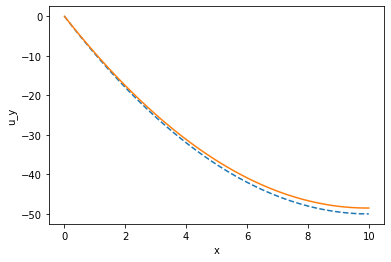

In [15]:
# Compiling animation
mpl.rcParams['savefig.facecolor'] = 'white'
fig, ax = plt.subplots()
ax.set_xlim(0,H)
ax.set_ylim(min(u_final), max(u_final))

def animate(i):
    u = frames[i]
    ax.clear()
    ax.plot(x, u_final, '--')
    ax.plot(x, u)
    ax.set_xlabel('x')
    ax.set_ylabel('u_y')

anime = animation.FuncAnimation(fig, animate, frames=len(frames), interval=5)
anime.save('Lava flow simulation.gif', writer='pillow')

## Real-time simulation (the animation is a bit shaky, sometimes stops updating...). Need to restart kernel in between runs

In [ ]:
%matplotlib notebook 
# Grid & diffusion parameters
angle = 45
D = 10 # viscosity
H = 10 # width of lava layer
Ngrid = 100
Nsteps = 300

dt = 0.3
dx = H/Ngrid
g = 10*np.sin(angle * np.pi/180) #gravity
beta = D*dt / (dx**2)
x = np.linspace(0, H, Ngrid)

# Initial condition
u = np.zeros(Ngrid)
u_final = g/D * (np.copy(x)**2 / 2 - H*np.copy(x))

# Plot setup
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
fig.canvas.draw()


# Evolution
for i in range(Nsteps):

    # Diffusion operation matrices
    A = np.eye(Ngrid)*(1+2*beta) + np.eye(Ngrid,k=1)*(-beta) + \
        np.eye(Ngrid,k=-1)*(-beta)
  
    # Boundary conditions
    A[Ngrid-1, Ngrid-1] = 1 + beta # No stress at air interface
    A[0,0] = 1 # No slip at slope interface
    A[0,1] = 0
     
    # Solve for next time step
    u_inter = u-g*dt # Including source while satisfying boundary condition
    u_inter[0] += g*dt
    u_inter[-1] += g*dt
    u = np.linalg.solve(A, u_inter)
    
    # Update plot
    ax.clear()
    ax.set_xlim([0, H])
    ax.set_ylim([min(u_final), max(u_final)])


    ax.set_xlabel('x')
    ax.set_ylabel('u_y')
    # Final state in the background
    ax.plot(x, u_final, '--')
    # Current state
    ax.plot(x, u)
    
    fig.canvas.draw()
    plt.pause(0.1)
    
print("All time steps done")